# Learning AI by Coding: Part 3-1 Deep Learning - Fundamental

### Topics to cover in this notebook

1. **Introduction to Neural Networks**
   - Perceptrons
   - Activation Functions
   - Feedforward Networks

2. **Backpropagation**
   - Gradient Descent
   - Chain Rule in Calculus
   - Optimizers (SGD, Adam)

3. **Convolutional Neural Networks (CNNs)**
   - Convolution Layers
   - Pooling Layers
   - Basic Applications in Image Recognition

4. **Recurrent Neural Networks (RNNs)**
   - LSTM and GRU
   - Sequence Models
   - Applications in NLP and Time Series

5. **Regularization Techniques**
   - Dropout
   - L1/L2 Regularization
   - Early Stopping

6. **Frameworks**
   - TensorFlow
   - PyTorch

### What is Deep Learning?

Deep learning is a **subfield of machine learning** focused on algorithms and models inspired by the structure and function of the brain, namely artificial neural networks. 
- Unlike traditional machine learning techniques, deep learning is particularly adept at automatically learning to represent data by training on a large dataset. 
- This automated feature extraction makes deep learning highly effective for complex tasks like image recognition, natural language processing, and even game playing.

In deep learning, 
- Models are composed of layers of interconnected nodes or `"neurons."` These layers can be as simple as a single linear transformation or as complex as a set of convolutions, recurrent loops, or self-attention mechanisms. 
- The `"deep"` in deep learning refers to the use of `multiple layer`s, which allows the model to learn more abstract and complex representations of the data.

Popular architectures in deep learning include 
- `Convolutional Neural Networks (CNNs)` for image-related tasks, 
- `Recurrent Neural Networks (RNNs)` for sequence data, and more recently, 
- `Transformer models`, which have shown remarkable performance in natural language processing tasks.

The field has seen rapid advancements, enabled by the increasing availability of large datasets and powerful computational resources. Deep learning is now employed across various sectors, including healthcare, finance, autonomous vehicles, and many others, making it one of the most impactful technologies of the modern era.

### Python libraries and tools for Deep Learning

##### Core Libraries

1. **NumPy**  
   - For numerical operations and handling arrays.
  
2. **Pandas**  
   - For data manipulation and analysis.

3. **Matplotlib**  
   - For data visualization.

##### Machine Learning Libraries

1. **Scikit-learn**  
   - For traditional machine learning algorithms and data preprocessing.

##### Deep Learning Frameworks

1. **TensorFlow**  
   - Google's open-source library for creating and training neural networks.

2. **PyTorch**  
   - Developed by Facebook, known for its dynamic computational graph, which makes it particularly good for research.

3. **Keras**  
   - A high-level neural networks API running on top of TensorFlow. Good for beginners.

##### Natural Language Processing

1. **NLTK (Natural Language Toolkit)**  
   - For text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

2. **Spacy**  
   - Industrial-strength natural language processing.

3. **Hugging Face Transformers**  
   - For state-of-the-art natural language processing models like BERT and GPT.

##### Computer Vision

1. **OpenCV**  
   - For real-time computer vision.

2. **PIL (Pillow)**  
   - For opening, manipulating, and saving many different image file formats.

##### Data Loading and Augmentation

1. **TensorFlow Data API / PyTorch DataLoader**  
   - For efficient data loading and preprocessing.

2. **Albumentations / imgaug**  
   - For image data augmentation.

##### Model Deployment and Monitoring

1. **Flask / FastAPI**  
   - For creating APIs to serve your models.

2. **Docker**  
   - For containerizing your application for easier deployment and scalability.

3. **MLflow / TensorBoard**  
   - For experiment tracking and monitoring your models.

#### Tools Demo in python

##### 1. TensorFlow

TensorFlow is an **open-source machine learning framework** developed by Google. 
- It's designed to facilitate the building, training, and deployment of artificial neural networks, especially deep learning models. 
- TensorFlow excels at handling large-scale, distributed machine learning tasks and offers a comprehensive, flexible ecosystem with tools, libraries, and community support.

**Important Features Demonstrated**

1. **Tensor Operations**: TensorFlow allows you to easily perform operations on multi-dimensional arrays, called tensors.

In [ ]:
# ! pip install tensorflow

In [3]:
import tensorflow as tf
a = tf.constant([1, 2])
b = tf.constant([3, 4])
c = tf.add(a, b)  # Output: [4, 6]

print(c)

tf.Tensor([4 6], shape=(2,), dtype=int32)


2. **Automatic Differentiation**: This feature is crucial for training machine learning models using gradient-based optimization algorithms.

In [5]:
x = tf.Variable(3.0)
with tf.GradientTape() as tape:
    y = x ** 2
dy_dx = tape.gradient(y, x)  # Output: 6.0

print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


3. **Keras API**: TensorFlow includes the high-level Keras API for quick model prototyping.

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

print(model)

4. **Model Training**: TensorFlow simplifies the training loop.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

5. **Saving and Loading Models**: Models can easily be saved and restored.

In [ ]:
model.save("my_model")
new_model = tf.keras.models.load_model("my_model")

6. **TensorBoard**: TensorFlow offers TensorBoard for visualizing learning metrics and model architecture.

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')
model.fit(x_train, y_train, epochs=5, callbacks=[tensorboard_callback])

7. **Distributed Training**: TensorFlow makes it easier to distribute training over multiple GPUs or even across multiple machines.

In [ ]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = create_model()
model.fit(x_train, y_train, epochs=5)

8. **Demo TensorFlow**

4/4 [==============================] - 0s 1ms/step


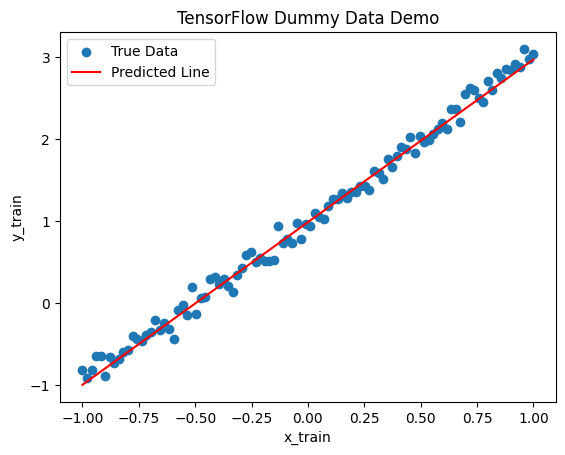

Model training is complete.


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Generate dummy data
np.random.seed(0)
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + 1 + 0.1 * np.random.randn(*x_train.shape)

# Reshape for TensorFlow
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# Define a simple linear model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=500, verbose=0)

# Make predictions
y_pred = model.predict(x_train)

# Visualization
plt.scatter(x_train, y_train, label='True Data')
plt.plot(x_train, y_pred, color='red', label='Predicted Line')
plt.legend()
plt.title('TensorFlow Dummy Data Demo')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

print("Model training is complete.")


##### 2. PyTorch

In [ ]:
#! pip install torch torchvision torchaudio # MacOS
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu # linux

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab. 
- It is particularly popular for deep learning and scientific computing projects. 
- PyTorch is known for its dynamic computation graph, which makes it highly flexible and conducive to research and experimentation. 

Like TensorFlow, it also offers a wide array of tools for data loading, transformations, and visualization.

**Important Features Demonstrated in Python**

1. **Tensor Operations**: Similar to TensorFlow, PyTorch allows for a wide range of tensor operations.

In [2]:
import torch
a = torch.tensor([1, 2])
b = torch.tensor([3, 4])
c = a + b  # Output: tensor([4, 6])

print(c)

tensor([4, 6])


2. **Automatic Differentiation**: PyTorch also provides autograd for automatic differentiation.

In [3]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)  # Output: tensor(6.0)

tensor(6.)


3. **Neural Network API**: PyTorch has a `torch.nn` module for creating neural networks.

In [ ]:
import torch.nn as nn
model = nn.Sequential(
    nn.Linear(1, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

4. **Model Training**: The training loop can be customized, offering more flexibility.

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(50):
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

5. **Saving and Loading Models**: It’s straightforward to save and load models.

In [ ]:
torch.save(model.state_dict(), 'model.pth')
model.load_state_dict(torch.load('model.pth'))

6. **GPU Acceleration**: Easily switch between CPU and GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

7. **Dynamic Computation Graph**: PyTorch creates dynamic computation graphs, making it easier to work with dynamic inputs and modify architectures during runtime.

**PyTorch Demo**

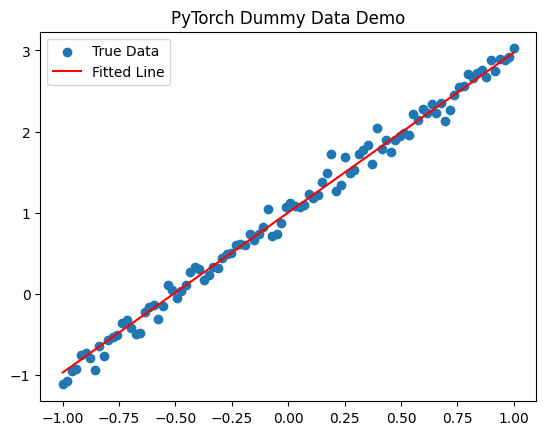

Model training is complete.


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate dummy data
torch.manual_seed(0)
x_train = torch.linspace(-1, 1, 100).reshape(-1, 1)
y_train = 2 * x_train + 1 + 0.1 * torch.randn(x_train.size())

# Define the model as a simple linear regression (y = ax + b)
class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)

model = SimpleLinearModel()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(x_train)
    
    # Compute loss
    loss = criterion(y_pred, y_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

# Make predictions
y_pred = model(x_train).detach().numpy()

# Plot the results
plt.scatter(x_train, y_train, label='True Data')
plt.plot(x_train, y_pred, label='Fitted Line', color='red')
plt.legend()
plt.title("PyTorch Dummy Data Demo")
plt.show()

print("Model training is complete.")


##### 3. Keras

Keras is a high-level neural networks API that was developed to enable fast experimentation. 
- Initially, it was designed to work on top of other, lower-level libraries like TensorFlow, Theano, or CNTK. 
- Starting with TensorFlow 2.x, Keras is now the official high-level API for TensorFlow and comes bundled with it. 

Keras makes it easy to get started with deep learning, offering user-friendly and easy-to-understand APIs.

**Important Features Demo**

1. **Simple Model Building**: Keras allows for easy assembling of layers to create models.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

2. **Compilation**: Before training a model, you configure the learning process with compile.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

3. **Training**: Keras abstracts away much of the complexity in building a training loop.

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

4. **Evaluation and Prediction**: Simple methods to evaluate and make predictions.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
predictions = model.predict(new_data)

5. **Preprocessing and Data Augmentation**: Keras has utilities for image and text preprocessing.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20)

6. **Functional API**: For complex architectures, Keras offers a more functional approach.

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(784,))
x = Dense(128, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

7. **Transfer Learning**: Keras provides pre-trained models for common tasks.

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False)

8. **Customization**: Keras allows you to define custom layers, losses, and metrics.

In [ ]:
from tensorflow.keras import backend as K

def custom_loss(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

##### Keras Demo

313/313 [==============================] - 1s 2ms/step - loss: 0.8716 - accuracy: 0.7268
Test Accuracy: 72.68%


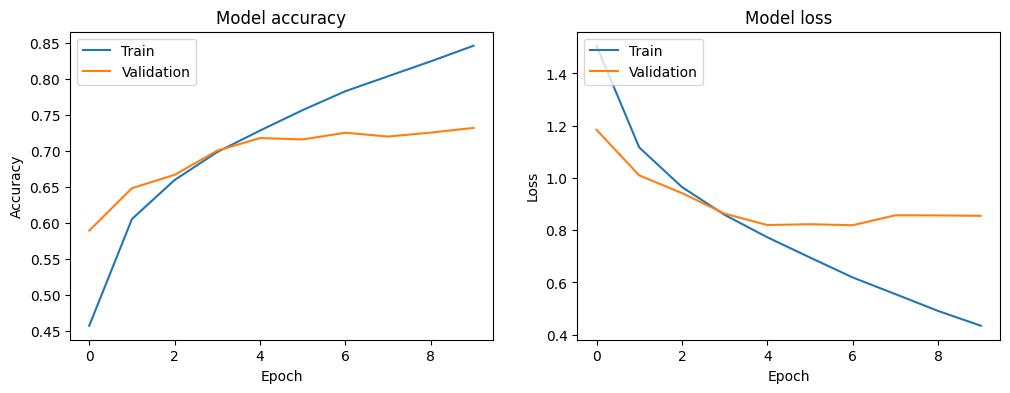

1/1 [==============================] - 0s 47ms/step


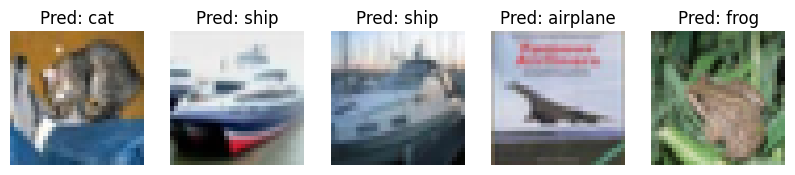

Visualizations are complete.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define a CNN model using Keras
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 1. Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# 2. Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 3. Visualize some sample predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test[:5])
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()

print("Visualizations are complete.")


In this example:

- We first load the CIFAR-10 dataset and preprocess it.
- We define a CNN model using Keras. The architecture consists of two convolutional layers followed by max-pooling layers, and then fully connected layers.
- We use the Dropout layer to prevent overfitting.
- The model is compiled with the Adam optimizer and categorical crossentropy loss.
- Training is performed using the `fit` method.
- Finally, we evaluate the trained model on test data.

##### 4. NLTK (Natural Language Toolkit)

NLTK is a leading platform for building Python programs to work with human language data. 
- It provides tools for tasks ranging from tokenization, stemming, and tagging to more complex tasks like parsing and machine learning. 
- It's not just a single tool, but rather a suite of libraries and programs to conduct symbolic and statistical natural language processing (NLP) for the English language.

**Important features of NLTK**:

1. **Tokenization**: Dividing text into words or sentences.
2. **Stemming and Lemmatization**: Reducing words to their root form.
3. **Part-of-Speech Tagging**: Classifying words into their parts of speech.
4. **Named Entity Recognition (NER)**: Classifying named entities like 'person', 'organization', 'location', etc.
5. **Parsing**: Structural analysis of sentences.
6. **Concordance**: Words occurrence with context.
7. **Corpora**: NLTK includes a vast collection of corpora and word datasets.
8. **Frequency distribution and dispersion plots**.

**NLTK Features Demo**

In [ ]:
# !pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import stopwords
from nltk.text import Text

# Download necessary datasets
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')

text = "NLTK is a leading platform for building Python programs to work with human language data. It was created by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania."


In [2]:
# 1. Tokenization
words = word_tokenize(text)
sentences = sent_tokenize(text)
print(f"Words: {words}")
print(f"Sentences: {sentences}")

Words: ['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'was', 'created', 'by', 'Steven', 'Bird', 'and', 'Edward', 'Loper', 'in', 'the', 'Department', 'of', 'Computer', 'and', 'Information', 'Science', 'at', 'the', 'University', 'of', 'Pennsylvania', '.']
Sentences: ['NLTK is a leading platform for building Python programs to work with human language data.', 'It was created by Steven Bird and Edward Loper in the Department of Computer and Information Science at the University of Pennsylvania.']


In [4]:
# 2. Stemming and Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmed_word = stemmer.stem("running")  # Returns 'run'
lemmatized_word = lemmatizer.lemmatize("running", pos='v')  # Returns 'run'
print(f"Stemmed: {stemmed_word}, Lemmatized: {lemmatized_word}")

Stemmed: run, Lemmatized: run


In [5]:
# 3. Part-of-Speech Tagging
tags = pos_tag(words)
print(f"Tags: {tags}")

Tags: [('NLTK', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('leading', 'VBG'), ('platform', 'NN'), ('for', 'IN'), ('building', 'VBG'), ('Python', 'NNP'), ('programs', 'NNS'), ('to', 'TO'), ('work', 'VB'), ('with', 'IN'), ('human', 'JJ'), ('language', 'NN'), ('data', 'NNS'), ('.', '.'), ('It', 'PRP'), ('was', 'VBD'), ('created', 'VBN'), ('by', 'IN'), ('Steven', 'NNP'), ('Bird', 'NNP'), ('and', 'CC'), ('Edward', 'NNP'), ('Loper', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('Department', 'NNP'), ('of', 'IN'), ('Computer', 'NNP'), ('and', 'CC'), ('Information', 'NNP'), ('Science', 'NNP'), ('at', 'IN'), ('the', 'DT'), ('University', 'NNP'), ('of', 'IN'), ('Pennsylvania', 'NNP'), ('.', '.')]


In [6]:
# 4. Named Entity Recognition
tree = ne_chunk(tags)
print(tree)

(S
  (ORGANIZATION NLTK/NNP)
  is/VBZ
  a/DT
  leading/VBG
  platform/NN
  for/IN
  building/VBG
  (PERSON Python/NNP)
  programs/NNS
  to/TO
  work/VB
  with/IN
  human/JJ
  language/NN
  data/NNS
  ./.
  It/PRP
  was/VBD
  created/VBN
  by/IN
  (PERSON Steven/NNP Bird/NNP)
  and/CC
  (PERSON Edward/NNP Loper/NNP)
  in/IN
  the/DT
  (ORGANIZATION Department/NNP)
  of/IN
  (ORGANIZATION Computer/NNP)
  and/CC
  (ORGANIZATION Information/NNP Science/NNP)
  at/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (GPE Pennsylvania/NNP)
  ./.)


In [7]:
# 5. Concordance
tokens = Text(word_tokenize(text))
tokens.concordance("NLTK")

Displaying 1 of 1 matches:
 NLTK is a leading platform for building P


In [8]:
# 6. Removing stopwords
filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
print(f"Filtered Words: {filtered_words}")

Filtered Words: ['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.', 'created', 'Steven', 'Bird', 'Edward', 'Loper', 'Department', 'Computer', 'Information', 'Science', 'University', 'Pennsylvania', '.']


**Demo: NLTK Sentiment Analysis**

NLTK comes with a built-in movie reviews dataset that consists of positive and negative movie reviews.

Here's an example to classify sentiments of movie reviews using NLTK:

1. **Load the dataset**:
2. **Preprocess the Data**: Tokenize and remove stop words.
3. **Feature Extraction**: Use word frequencies.
4. **Model Training**: Train a Naive Bayes classifier.
5. **Evaluation**: Test the classifier on unseen data.

In [ ]:
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# Download necessary datasets and resources
nltk.download('movie_reviews')
nltk.download('stopwords')

In [15]:
# Preprocess data: Tokenize and remove stop words
stop_words = set(stopwords.words('english'))

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Load movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to mix positive and negative reviews
import random
random.shuffle(documents)

# Get the top 2000 frequent words as features
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

# Create feature sets for documents
featuresets = [(document_features(d), c) for (d,c) in documents]

# Split into training and test sets
train_set, test_set = featuresets[100:], featuresets[:100]

# Train the classifier
classifier = NaiveBayesClassifier.train(train_set)

# Evaluate the classifier
print("Accuracy:", accuracy(classifier, test_set))

# Show the most important features (words that influence sentiment)
classifier.show_most_informative_features(10)

Accuracy: 0.77
Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.9 : 1.0
        contains(seagal) = True              neg : pos    =      8.3 : 1.0
         contains(mulan) = True              pos : neg    =      7.0 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.6 : 1.0
         contains(damon) = True              pos : neg    =      6.3 : 1.0
         contains(flynt) = True              pos : neg    =      5.6 : 1.0
          contains(lame) = True              neg : pos    =      5.6 : 1.0
        contains(wasted) = True              neg : pos    =      5.3 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.0 : 1.0
         contains(waste) = True              neg : pos    =      5.0 : 1.0


##### 5. Spacy

**spaCy** is a popular library in Python for natural language processing (NLP). 
- It's designed specifically for **production use** and can be used to build applications that process massive volumes of text efficiently. 
- spaCy comes with pre-trained models for several languages and supports tasks like tokenization, part-of-speech tagging, named entity recognition, and more.

**Key Features:**
1. **Tokenization**: Splitting text into words, punctuations, etc.
2. **Part-of-Speech (POS) Tagging**: Assigning word types to tokens, like verb or noun.
3. **Dependency Parsing**: Assigning syntactic dependency labels, describing relations between individual tokens.
4. **Lemmatization**: Assigning the base form of words.
5. **Named Entity Recognition (NER)**: Classifying named entities into categories, such as person names or locations.
6. **Word Vectors and Similarity**: Finding similarity between words or sentences.
7. **Text Classification**: Assigning categories or labels to a whole document.
8. **Rule-based Matching**: Finding sequences of tokens based on patterns.
9. **Training**: Updating or training with your own data.

**Spacy Demo**

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install typing-extensions --upgrade

In [ ]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Process a text
text = "Apple is planning to open a new factory in San Francisco for $10 million."
doc = nlp(text)

In [3]:
# 1. Tokenization
print("Tokens:")
for token in doc:
    print(token.text)

Tokens:
Apple
is
planning
to
open
a
new
factory
in
San
Francisco
for
$
10
million
.


In [4]:
# 2. Part-of-Speech Tagging
print("\nPOS Tagging:")
for token in doc:
    print(token.text, "-", token.pos_)


POS Tagging:
Apple - PROPN
is - AUX
planning - VERB
to - PART
open - VERB
a - DET
new - ADJ
factory - NOUN
in - ADP
San - PROPN
Francisco - PROPN
for - ADP
$ - SYM
10 - NUM
million - NUM
. - PUNCT


In [5]:
# 3. Named Entity Recognition
print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)


Named Entities:
Apple - ORG
San Francisco - GPE
$10 million - MONEY


In [6]:
# 4. Dependency Parsing
print("\nDependencies:")
for token in doc:
    print(token.text, "<-", token.dep_, "<-", token.head.text)


Dependencies:
Apple <- nsubj <- planning
is <- aux <- planning
planning <- ROOT <- planning
to <- aux <- open
open <- xcomp <- planning
a <- det <- factory
new <- amod <- factory
factory <- dobj <- open
in <- prep <- factory
San <- compound <- Francisco
Francisco <- pobj <- in
for <- prep <- open
$ <- quantmod <- million
10 <- compound <- million
million <- pobj <- for
. <- punct <- planning


In [7]:
# 5. Word Vectors (if the model supports it)
apple = nlp("apple")
banana = nlp("banana")
print("\nSimilarity between apple and banana:", apple.similarity(banana))


Similarity between apple and banana: 0.6804217829806684


/tmp/ipykernel_12226/2251460518.py:4: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print("\nSimilarity between apple and banana:", apple.similarity(banana))


In [12]:
# 6. Matcher Example
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
pattern = [{"TEXT": "Francisco"}]
matcher.add("SF_PATTERN", [pattern])
matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print("\nMatched span:", matched_span.text)


Matched span: Francisco


**Example: Resume Parsing**

When companies receive many resumes, 
- it's helpful to automatically extract information such as names, companies, job titles, educational institutions, years of experience, etc. 
- This process can help in sorting and categorizing applicants.

Using spaCy, we can implement a basic resume parser that extracts the following:
1. Named entities (like names of people, organizations, and educational institutions).
2. Years (to possibly infer experience or graduation years).

In [13]:
import spacy
from spacy.matcher import Matcher

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Resume text (just a sample for demonstration)
resume_text = """
John Doe
Software Engineer at TechCorp
Experience: 5 years
Education: B.Sc. in Computer Science from Stanford University, 2016
"""

In [14]:
doc = nlp(resume_text)

# Extract named entities
print("Named Entities:")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)

# Extract years using rule-based matching
matcher = Matcher(nlp.vocab)
# Pattern to match four-digit numbers which likely represent years
year_pattern = [{"SHAPE": "dddd"}]
matcher.add("YEAR_PATTERN", [year_pattern])

print("\nYears:")
for _, start, end in matcher(doc):
    print(doc[start:end].text)

# Further categorization can be added (e.g., mapping certain entities to specific categories like job titles).

Named Entities:
John Doe
 - PERSON
TechCorp - ORG
5 years - DATE
Education - ORG
Computer Science - ORG
Stanford University - ORG
2016 - DATE

Years:
2016


##### 6. Hugging Face Transformers

##### 7. OpenCV

##### 8. PIL (Pillow)

##### 9. TensorFlow Data API

##### 10. PyTorch DataLoader

##### 11. Albumentations

##### 12. imgaug

##### 13. MLflow 

##### 14. TensorBoard

----
### Note

##### Key differences and similarities between TensorFlow and PyTorch:

| Feature                     | TensorFlow                               | PyTorch                             |
|-----------------------------|------------------------------------------|-------------------------------------|
| **Origin**                  | Developed by Google Brain                | Developed by Facebook's FAIR lab    |
| **Graph Type**              | Static computation graph (Eager Execution available) | Dynamic computation graph       |
| **Ease of Debugging**       | Less intuitive due to static graph       | Easier due to dynamic graph        |
| **API Design**              | Higher-level APIs (Keras)                | More Pythonic, imperative style     |
| **Performance**             | Highly optimized for production          | Often considered better for research|
| **Hardware Acceleration**   | TPU support in addition to GPU and CPU   | Primarily GPU and CPU               |
| **Deployment**              | TensorFlow Serving, TensorFlow Lite, TensorFlow.js | TorchScript, ONNX                 |
| **Community and Popularity**| Larger community and more documentation  | Growing rapidly, especially in academia|
| **Automatic Differentiation**| AutoDiff through TensorFlow 2.x         | AutoDiff via Autograd              |
| **Serialization**           | Save and load using `SavedModel`         | Save and load using `torch.save` and `torch.load`|
| **Visualization Tools**     | TensorBoard                             | TensorBoard, Visdom                |
| **Learning Curve**          | Steeper learning curve                   | Considered easier to pick up       |

Both frameworks are highly capable and choosing between the two often comes down to specific project requirements, the team's familiarity with the framework, and whether the focus is on research or production.

#### Scenarios to use TensorFlow directly , without Keras

1. **Fine-grained Control**: If you need very specific behavior during training, evaluation, or inference that isn't directly provided by Keras, you might opt for TensorFlow's lower-level capabilities.

2. **Custom Training Loops**: For some advanced models or training techniques, you might want to write your own custom training loops. With TensorFlow, you can have precise control over the gradients, optimization steps, and other aspects of training.

3. **Advanced Architectures**: While Keras is very versatile, extremely complex architectures might be more naturally implemented directly in TensorFlow, especially if they involve intricate operations.

4. **Distributed Training**: If you're planning to distribute your training across multiple GPUs or machines (in a setup not supported by Keras's built-in methods), TensorFlow's distributed training capabilities can be invaluable.

5. **Use of TensorFlow Ecosystem**: TensorFlow has a vast ecosystem, including TensorFlow Extended (TFX) for production pipelines, TensorFlow Lite for mobile, TensorFlow.js for browser-based applications, and more. If you are deeply integrating with these tools, direct TensorFlow usage can be more natural.

6. **Optimizations and Performance**: If you are trying to optimize the runtime of your model or if you're deploying it to specific platforms where performance is critical, TensorFlow can provide more tools and options for optimization.

7. **Research Purposes**: If you're in a research setting where you're constantly trying out new algorithms or techniques, TensorFlow's flexibility can be more appropriate than the structured nature of Keras.

8. **TensorFlow Operations**: For projects that require extensive use of TensorFlow-specific operations not available in Keras or require customized operations using `tf.function` for performance, using TensorFlow directly is the way to go.

However, Keras and TensorFlow are not mutually exclusive; you can mix and match. For example, you can use Keras layers within a custom TensorFlow training loop.

#### Intent classification dataset (public)

1. **SNIPS Natural Language Understanding (NLU) dataset**: This is a popular benchmark dataset for intent classification and slot filling tasks. The dataset is divided into seven different intents like 'AddToPlaylist', 'BookRestaurant', 'SearchScreeningEvent', etc.
   - [Download link](https://github.com/snipsco/nlu-benchmark/tree/master/2017-06-custom-intent-engines)

2. **Chatbot Corpus**: Contains dialogues and was designed to train chatbot models. It can be repurposed for intent classification.
   - [Download link](https://github.com/sebischair/NLU-Evaluation-Corpora)

3. **Rasa NLU benchmarking dataset**: Rasa, a chatbot framework, released their dataset that contains multiple intents.
   - [Download link](https://github.com/RasaHQ/NLU-training-data)

4. **Intent Recognition (CLINC150) dataset**: Contains 150 intent classes made up of 10,100 examples across 10 diverse domains.
   - [Download link](https://github.com/clinc/oos-eval)

##### Fix Tensorflow warning message

```
This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
```

Note: Virtual environment on Mac

1. Install Bazel https://bazel.build/install/os-x

2. Clone TensorFlow Repository (Interminal + venv)
    
    ```
    git clone https://github.com/tensorflow/tensorflow.git
    cd tensorflow
    ```

3. Configure the Build (Interminal + venv)
    
    ```
    ./configure
    ```